In [ ]:
from google.colab import drive
drive.mount('gdrive')

Mounted at gdrive


In [ ]:
!pip install xlrd

#Import data

In [ ]:
import numpy as np
import pandas as pd
import re

In [ ]:
path='/content/gdrive/MyDrive/IE402/Data/data.xlsx'

In [ ]:
df= pd.read_excel(path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   STT                 190 non-null    int64  
 1   SITES               190 non-null    object 
 2   Warning po          190 non-null    object 
 3   Locality            189 non-null    object 
 4   Y                   190 non-null    float64
 5   X                   190 non-null    float64
 6   Warning_le          190 non-null    object 
 7   Describe            179 non-null    object 
 8   LONG (m)            164 non-null    object 
 9   Featured            189 non-null    object 
 10  Region              189 non-null    object 
 11  Note                89 non-null     object 
 12  dis_to_river        190 non-null    float64
 13  domsoil             190 non-null    object 
 14  faosoil             190 non-null    object 
 15  Type                190 non-null    object 
 16  soil_nam

In [ ]:
df.columns

Index(['STT', 'SITES', 'Warning po', 'Locality', 'Y', 'X', 'Warning_le',
       'Describe', 'LONG (m)', 'Featured', 'Region', 'Note', 'dis_to_river',
       'domsoil', 'faosoil', 'Type', 'soil_name', 'level_soil',
       'level_soil_encoded', 'feature_soil', 'dist_to_soil', 'Frequency',
       'dist_to_flood', 'level'],
      dtype='object')

In [ ]:
df

,STT,SITES,Warning po,Locality,Y,X,Warning_le,Describe,LONG (m),Featured,...,faosoil,Type,soil_name,level_soil,level_soil_encoded,feature_soil,dist_to_soil,Frequency,dist_to_flood,level
0,1,"Human Hue Chi Linh, Hai Duong","K1-K1 + 950 + 550 (Human Hue Chi Linh, Hai Duong)","Human Hue Chi Linh, Hai Duong",21.08346,106.32191,Featuring dangerous no layout or design capital,Score's landslides Commune Hue Chi Linh Distri...,400,River bank,...,Ge56-3a,"Eutric Gleysols within 56cm,fine textured, lev...",Đất sét giàu dinh dưỡng phì nhiêu,TB,3,Giàu dinh dưỡng giữ nước tốt,0.0,5,21664.463247,4
1,2,"Thanh Quang, Nam Sach, Hai Duong",K8-K9 + 870 + 690 + 949-K10 and K9 + 300 (Than...,"Thanh Quang, Nam Sach, Hai Duong",21.06207,106.36371,Featuring dangerous no layout or design capital,"Paragraph 2015 landslide 1531m long, 5m wide, ...",1531,River bank,...,Ge56-3a,"Eutric Gleysols within 56cm,fine textured, lev...",Đất sét giàu dinh dưỡng phì nhiêu,TB,3,Giàu dinh dưỡng giữ nước tốt,0.0,5,17313.708943,4
2,3,"Minh Tan, Nam Sach Hai Duong province","K19 + K19 + 249-367 (Ming Tan, Nam Sach Hai Du...","Minh Tan, Nam Sach Hai Duong province",20.97159,106.29291,The normal point,Erosion downstream embankment Minh Tan Hung Th...,110,River bank,...,Ge56-3a,"Eutric Gleysols within 56cm,fine textured, lev...",Đất sét giàu dinh dưỡng phì nhiêu,TB,3,Giàu dinh dưỡng giữ nước tốt,0.0,5,27018.023721,1
3,4,Avalanche incidents in the area of ??the Red R...,K68 + 880 (Incident landslides in the area of ...,"Bach Dang Ward, Hai Ba Trung District",21.01351,105.86643,The normal point,"Provide erosion 15m length, 3m deep into the s...",15,River bank,...,Je72-2a,"Eutric Fluvisols within 72 cm, medium textured...",Đất phù sa phì nhiêu,Cao,5,"Phù sa thường không giữ nước tốt, dễ bị cuốn t...",0.0,10,93.251926,1
4,5,"Moc Bac commune in Duy Tien district, Ha Nam p...",K117 + 950-K118 (Jupiter Northern Affairs Duy ...,"Moc Bac commune in Duy Tien district, Ha Nam p...",20.70153,106.00178,The normal point,"Time: 2000-2017 Length 50m, 3m wide Loss of ag...",50,River bank,...,Je72-2a,"Eutric Fluvisols within 72 cm, medium textured...",Đất phù sa phì nhiêu,Cao,5,"Phù sa thường không giữ nước tốt, dễ bị cuốn t...",0.0,15,48.496153,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,186,"Clips from the Huong Mai Tieu Dua, Ca Mau","Coast (Clips from the Huong Mai Tieu Dua, Ca Mau)","Clips from the Huong Mai Tieu Dua, Ca Mau",9.52982,104.83684,Featuring dangerous to plan allocating capital,Time landslide: 2015 -2017 landslide Length: 1...,14 775,Seaside,...,Jt13-3a,"Thionic Fluvisols within 13 cm, fine textured,...",Đất phù sa nước lợ mặn,Cao,5,Có tính chất nhẹ dễ di chuyển,0.0,5,810.232127,3
186,187,"Section from Lung Ranh to Khanh Hoi, Ca Mau","Sea (Clips from Lung Ranh to Khanh Hoi, Ca Mau)","Section from Lung Ranh to Khanh Hoi, Ca Mau",9.37548,104.83038,Featuring dangerous to plan allocating capital,Time landslide: 2014 -2017 landslide length: 7...,7750,Seaside,...,Ge55-3a,"Eutric Gleysols within 55cm,fine textured, lev...",Đất sét giàu dinh dưỡng phì nhiêu,TB,3,Giàu dinh dưỡng giữ nước tốt,0.0,15,3807.529029,3
187,188,"West Coast Tran Van Thoi period (from WB9), Ca...",Coast (West Coast Tran Van Thoi period (from W...,"West Coast Tran Van Thoi period (from WB9), Ca...",9.27406,104.82397,Featuring dangerous to plan allocating capital,Length: 17 732 m,17 732,Seaside,...,Ge55-3a,"Eutric Gleysols within 55cm,fine textured, lev...",Đất sét giàu dinh dưỡng phì nhiêu,TB,3,Giàu dinh dưỡng giữ nước tốt,0.0,10,1688.673987,3
188,189,"Ganh Hao town, Dong Hai District, Bac Lieu Pro...","Embankment Ganh Hao (Town Ganh Hao, Dong Hai D...","Ganh Hao town, Dong Hai District, Bac Lieu Pro...",9.02244,105.41805,Featuring dangerous to plan allocating capital,"Coastal erosion Ganh Hao town, Dong Hai Distri...",2000,Seaside,...,Je73-3a,"Eutric Fluvisols within 73 cm, fine textured, ...",Đất phù sa phì nhiêu,Cao,5,"Phù sa thường không giữ nước tốt, dễ bị 

In [ ]:
df.fillna(0, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   STT                 190 non-null    int64  
 1   SITES               190 non-null    object 
 2   Warning po          190 non-null    object 
 3   Locality            190 non-null    object 
 4   Y                   190 non-null    float64
 5   X                   190 non-null    float64
 6   Warning_le          190 non-null    object 
 7   Describe            190 non-null    object 
 8   LONG (m)            190 non-null    object 
 9   Featured            190 non-null    object 
 10  Region              190 non-null    object 
 11  Note                190 non-null    object 
 12  dis_to_river        190 non-null    float64
 13  domsoil             190 non-null    object 
 14  faosoil             190 non-null    object 
 15  Type                190 non-null    object 
 16  soil_nam

In [ ]:
data_types = df.dtypes

numeric_columns = data_types[(data_types == 'float64') | (data_types == 'int64')].index
categorical_columns = data_types[data_types == 'object'].index

# In danh sách các cột biến số và biến phân loại
print("Biến số:")
print(numeric_columns)

print("\nBiến phân loại:")
print(categorical_columns)

Biến số:
Index(['STT', 'Y', 'X', 'dis_to_river', 'level_soil_encoded', 'dist_to_soil',
       'Frequency', 'dist_to_flood', 'level'],
      dtype='object')

Biến phân loại:
Index(['SITES', 'Warning po', 'Locality', 'Warning_le', 'Describe', 'LONG (m)',
       'Featured', 'Region', 'Note', 'domsoil', 'faosoil', 'Type', 'soil_name',
       'level_soil', 'feature_soil'],
      dtype='object')


#Data mining

In [ ]:
df_mining=df[['Y', 'X', 'dis_to_river',  'dist_to_soil',
       'Frequency', 'dist_to_flood', 'level']]

<ipython-input-14-d67c4acc9b2c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_mining, x='level', y='Y', inner='quartile', palette='viridis')
<ipython-input-14-d67c4acc9b2c>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_mining, x='level', y='X', inner='quartile', palette='viridis')
<ipython-input-14-d67c4acc9b2c>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_mining, x='level', y='dis_to_river', inner='quartile', palette='viridis')
<ipython-input-14-d67c4acc9b2c>:29: FutureWarning: 

Passing `palette

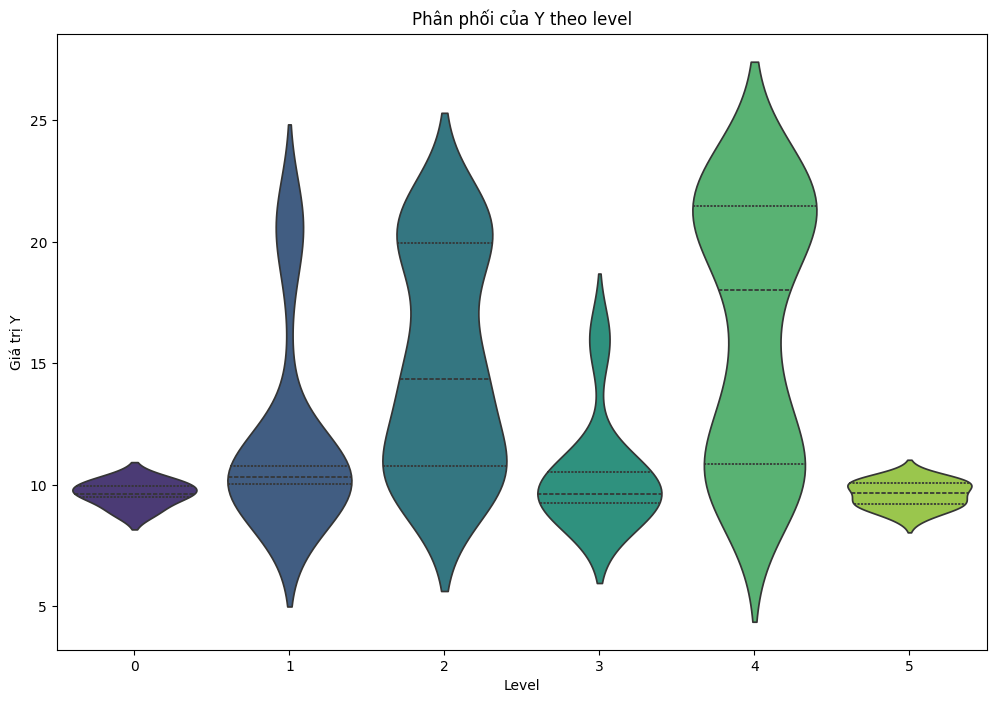

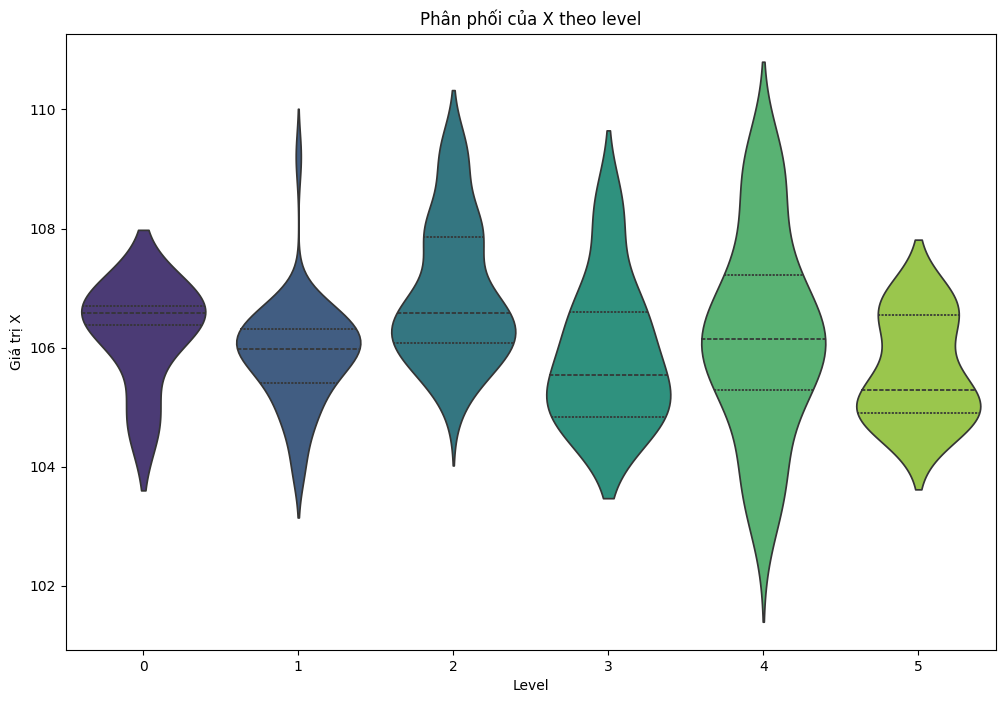

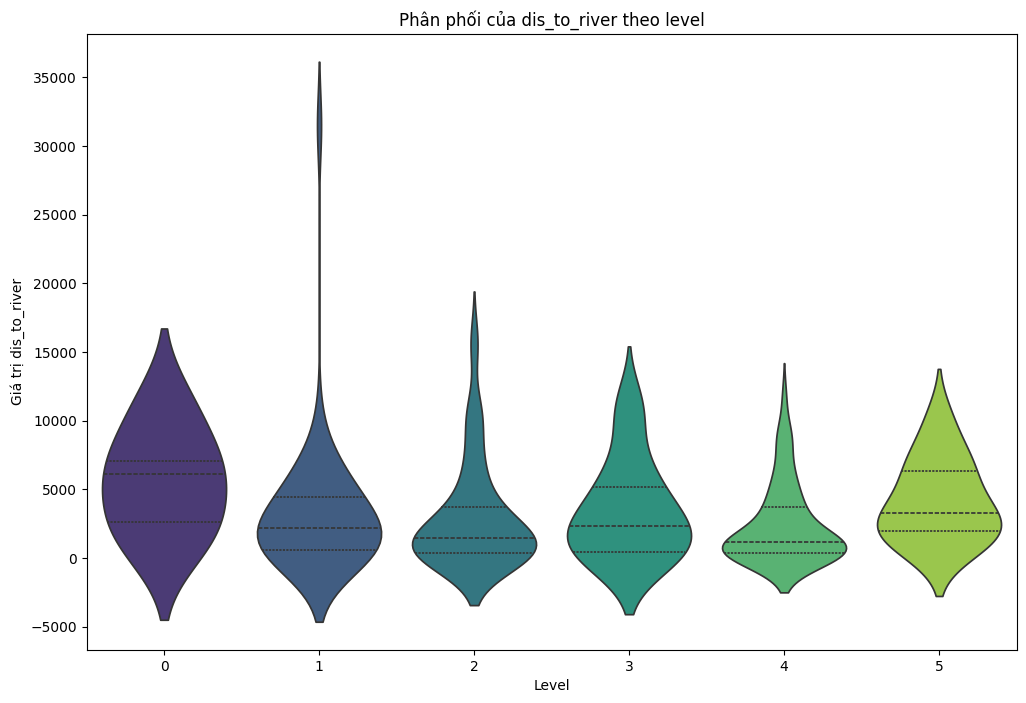

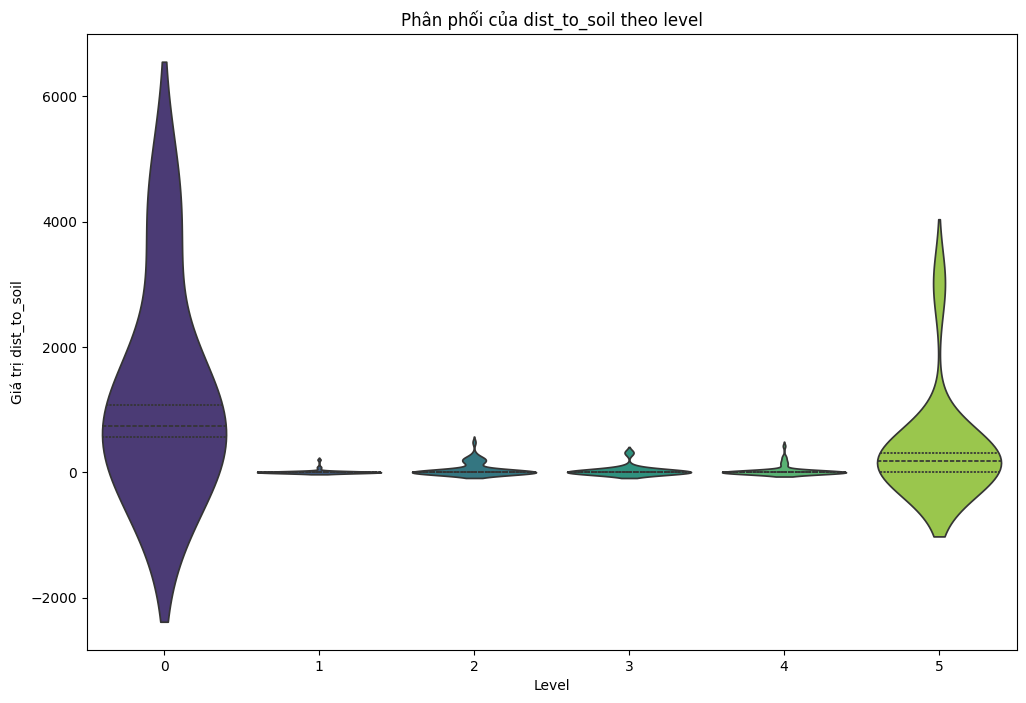

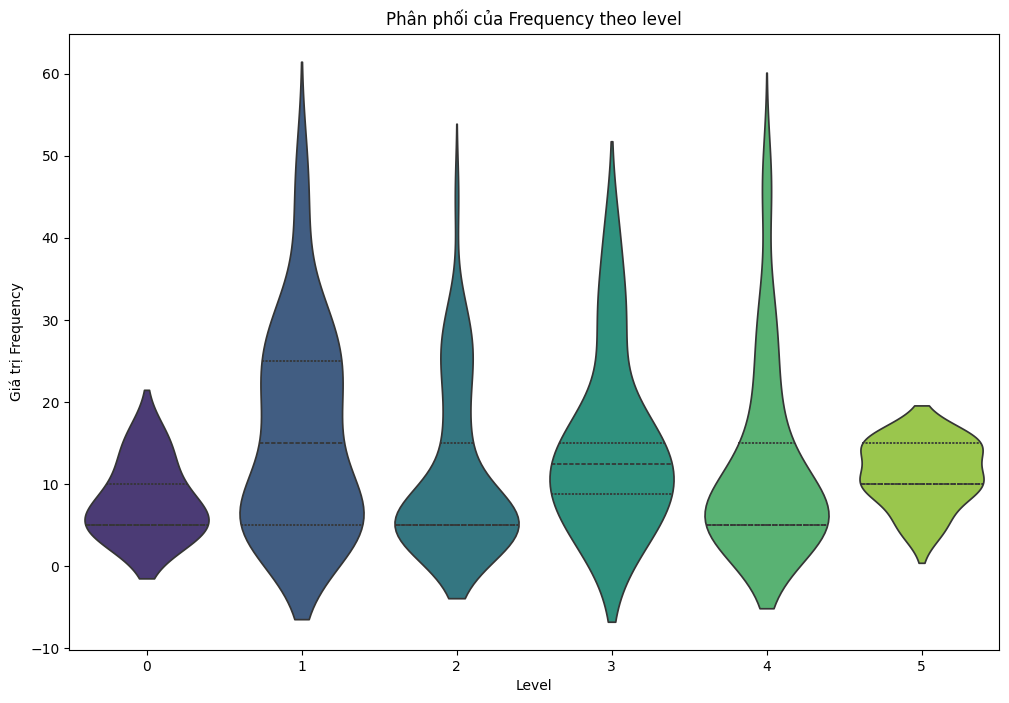

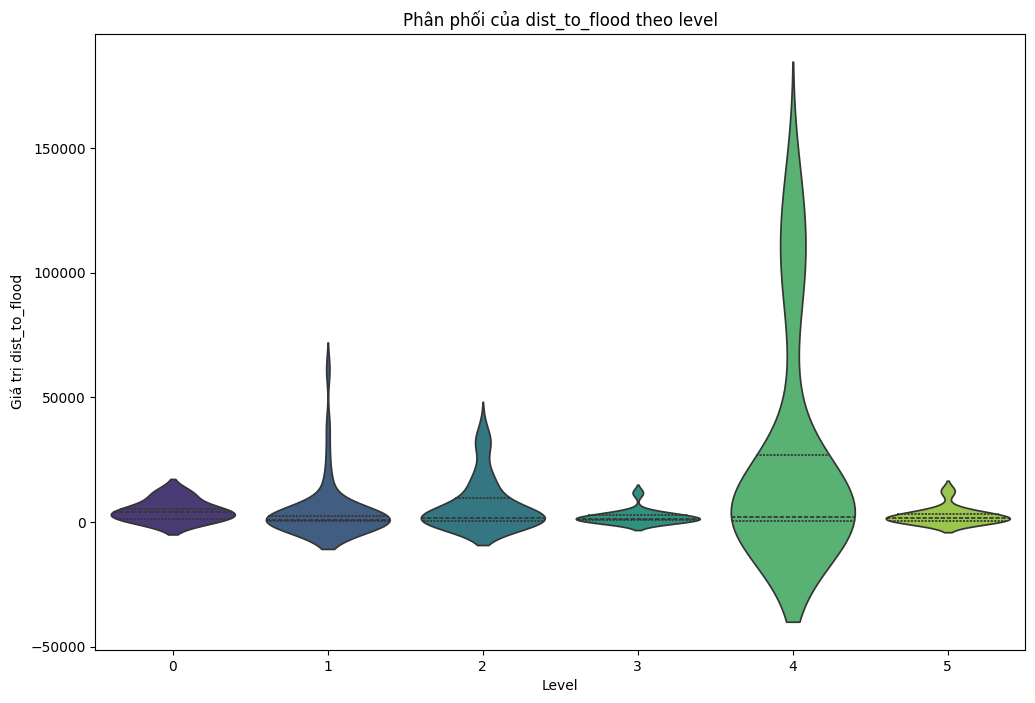

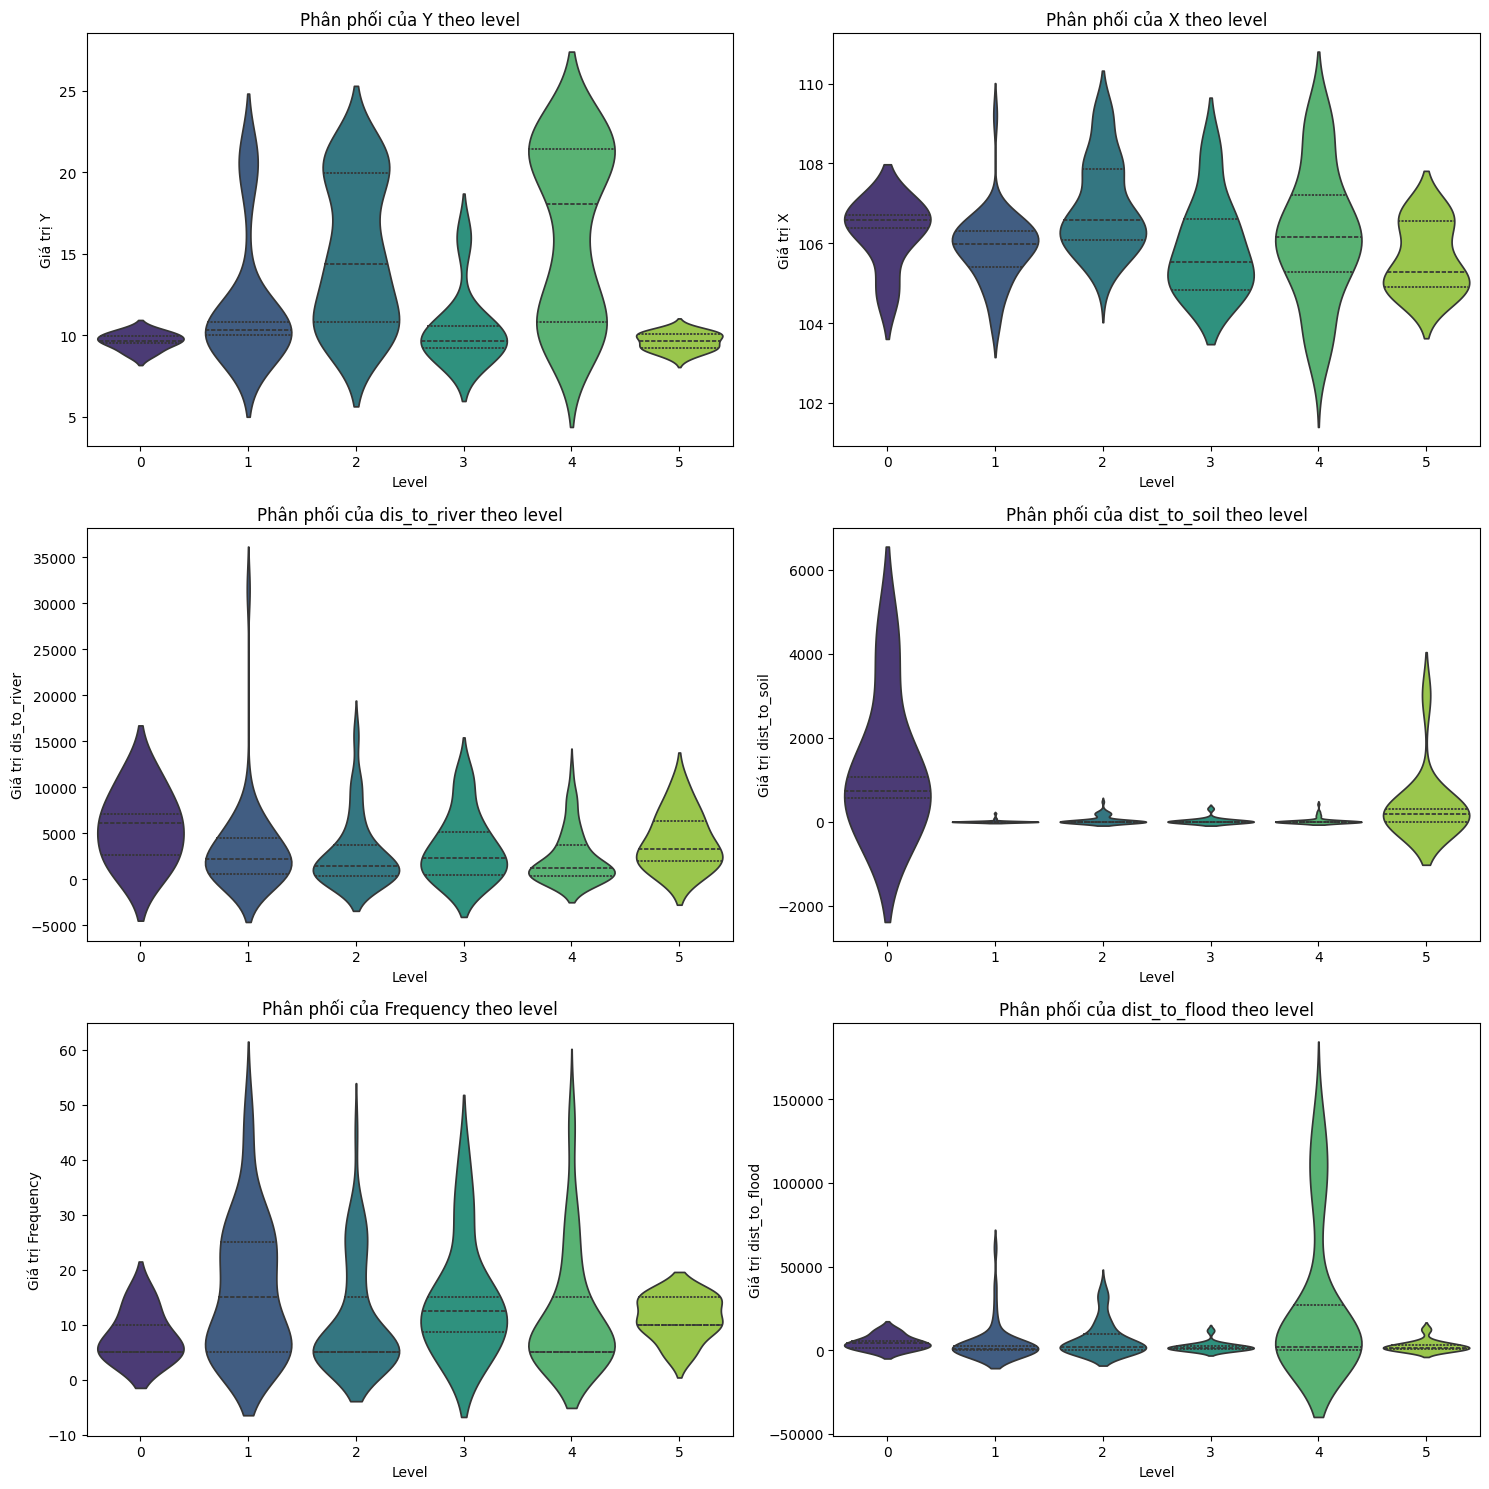

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Thiết lập kích thước của biểu đồ
plt.figure(figsize=(12, 8))

# Sử dụng seaborn để vẽ biểu đồ violin plot
sns.violinplot(data=df_mining, x='level', y='Y', inner='quartile', palette='viridis')
plt.title('Phân phối của Y theo level')
plt.xlabel('Level')
plt.ylabel('Giá trị Y')


plt.figure(figsize=(12, 8))
sns.violinplot(data=df_mining, x='level', y='X', inner='quartile', palette='viridis')
plt.title('Phân phối của X theo level')
plt.xlabel('Level')
plt.ylabel('Giá trị X')


plt.figure(figsize=(12, 8))
sns.violinplot(data=df_mining, x='level', y='dis_to_river', inner='quartile', palette='viridis')
plt.title('Phân phối của dis_to_river theo level')
plt.xlabel('Level')
plt.ylabel('Giá trị dis_to_river')


plt.figure(figsize=(12, 8))
sns.violinplot(data=df_mining, x='level', y='dist_to_soil', inner='quartile', palette='viridis')
plt.title('Phân phối của dist_to_soil theo level')
plt.xlabel('Level')
plt.ylabel('Giá trị dist_to_soil')


plt.figure(figsize=(12, 8))
sns.violinplot(data=df_mining, x='level', y='Frequency', inner='quartile', palette='viridis')
plt.title('Phân phối của Frequency theo level')
plt.xlabel('Level')
plt.ylabel('Giá trị Frequency')


plt.figure(figsize=(12, 8))
sns.violinplot(data=df_mining, x='level', y='dist_to_flood', inner='quartile', palette='viridis')
plt.title('Phân phối của dist_to_flood theo level')
plt.xlabel('Level')
plt.ylabel('Giá trị dist_to_flood')

import seaborn as sns
import matplotlib.pyplot as plt

# Thiết lập kích thước của hình
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# List các cột cần vẽ biểu đồ
columns_to_plot = ['Y', 'X', 'dis_to_river', 'dist_to_soil', 'Frequency', 'dist_to_flood']

# Vòng lặp để vẽ từng biểu đồ vào từng ô subplot
for i, column in enumerate(columns_to_plot):
    row = i // 2
    col = i % 2
    sns.violinplot(data=df_mining, x='level', y=column, inner='quartile', palette='viridis', ax=axes[row, col])
    axes[row, col].set_title(f'Phân phối của {column} theo level')
    axes[row, col].set_xlabel('Level')
    axes[row, col].set_ylabel(f'Giá trị {column}')

# Tối ưu hóa khoảng cách giữa các subplot
plt.tight_layout()

# Hiển thị hình
plt.show()


##Statistic

In [ ]:
df_mining.describe()

,Y,X,dis_to_river,dist_to_soil,Frequency,dist_to_flood,level
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,13.942767,106.273174,3055.150690,85.746116,12.973684,12172.413116,2.600000
std,4.858621,1.311364,3807.430259,390.788705,10.738564,28062.867126,1.363935
min,8.563980,102.862520,5.517109,0.000000,5.000000,5.374969,0.000000
25%,10.077605,105.510157,461.044978,0.000000,5.000000,302.914571,1.000000
50%,10.812620,106.184180,1734.191601,0.000000,10.000000,1308.513846,2.000000
75%,19.979790,106.745070,4411.026188,0.000000,18.750000,8285.463964,4.000000
max,22.818830,109.337160,31497.390188,4166.645548,50.000000,144602.969215,5.000000


Heatmap

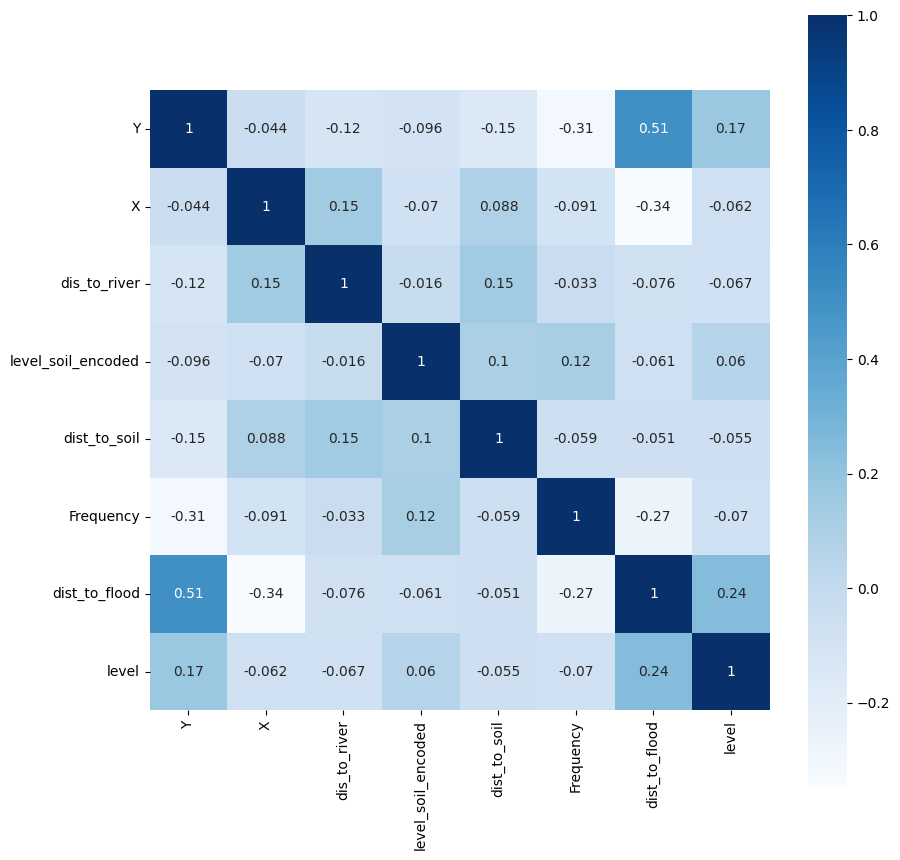

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation = df_mining.corr(method='pearson')
fig = plt.figure(figsize=(10,10))
sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap='Blues');

In [ ]:
df[['dis_to_river', 'level']]

,dis_to_river,level
0,5116.013664,4
1,7026.196973,4
2,4635.383601,1
3,5540.359191,1
4,5384.006487,1
...,...,...
185,6062.294371,3
186,3215.438910,3
187,2237.539036,3
188,457.530304,3


In [ ]:
import plotly.express as px

fig = px.bar(df_mining['level'].value_counts().reset_index(), x='index', y='level')

fig.update_layout(
    xaxis_title='Level',
    yaxis_title='Count',
    title='Distribution of Levels'
)

fig.show()

<ipython-input-28-d89650598ff6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mining['level_label'] = df_mining['level'].map(level_labels)


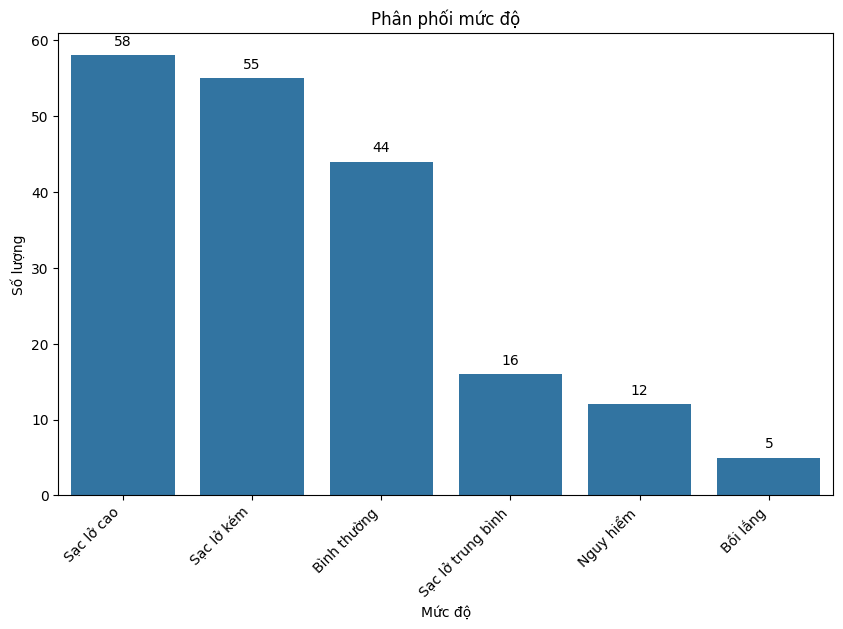

In [ ]:
level_labels = {0: 'Bồi lắng', 1: 'Bình thường', 2: 'Sạc lở kém', 3: 'Sạc lở trung bình', 4: 'Sạc lở cao', 5: 'Nguy hiểm'}
df_mining['level_label'] = df_mining['level'].map(level_labels)

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='level_label', data=df_mining, order=df_mining['level_label'].value_counts().index)

# Chú thích số lượng trên cột
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Chú thích
plt.title('Phân phối mức độ')
plt.xlabel('Mức độ')
plt.ylabel('Số lượng')
plt.xticks(rotation=45, ha='right')

plt.show()

In [ ]:
import plotly.express as px

filtered_df = df_mining[(df_mining['level'].isin([0, 1, 2, 3, 4, 5]))]

fig = px.scatter(filtered_df, x='dis_to_river', y='level', color='level', title='Scatter Plot of Level vs. Dis to River')

fig.update_layout(
    xaxis_title='Dis to River',
    yaxis_title='Level'
)

fig.show()

In [ ]:
import plotly.express as px

filtered_df = df_mining[(df_mining['level'].isin([0, 1, 2, 3, 4, 5]))]

fig = px.scatter(filtered_df, x='dist_to_flood', y='level', color='level', title='Scatter Plot of Level vs. Dis to Flood')

fig.update_layout(
    xaxis_title='Dis to flood',
    yaxis_title='Level'
)

fig.show()

#Pearson

In [ ]:
df_pearson=df[['X','Y','dis_to_river', 'level_soil_encoded', 'dist_to_soil',
       'Frequency', 'dist_to_flood', 'level']]

In [ ]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
anh_huong=[]
def timBienAnhHuong(df: pd.DataFrame, target_column: str):
    anh_huong = {'Feature': [], 'r': [], 'p-value': []}
    for col in df.columns:
        if col != target_column:
            anh_huong['Feature'].append(col)
            anh_huong['r'].append(stats.pearsonr(df[col], df[target_column])[0])
            anh_huong['p-value'].append(stats.pearsonr(df[col], df[target_column])[1])
    return pd.DataFrame(anh_huong)

In [ ]:
# Chọn biến mục tiêu
target_variable = 'level'

# Tìm các biến ảnh hưởng đến
anh_huong_vars = timBienAnhHuong(df_pearson, target_variable)
print("Các biến ảnh hưởng đến sạc lở\n", anh_huong_vars)

Các biến ảnh hưởng đến giá xe là:
               Feature         r   p-value
0                   X -0.062063  0.394960
1                   Y  0.173061  0.016950
2        dis_to_river -0.066927  0.358900
3  level_soil_encoded  0.060094  0.410159
4        dist_to_soil -0.055296  0.448601
5           Frequency -0.070081  0.336649
6       dist_to_flood  0.240759  0.000820


In [ ]:
anh_huong_df = pd.DataFrame(anh_huong_vars)
anh_huong_df

,Feature,r,p-value
0,X,-0.062063,0.394960
1,Y,0.173061,0.016950
2,dis_to_river,-0.066927,0.358900
3,level_soil_encoded,0.060094,0.410159
4,dist_to_soil,-0.055296,0.448601
5,Frequency,-0.070081,0.336649
6,dist_to_flood,0.240759,0.000820


##ANOVA

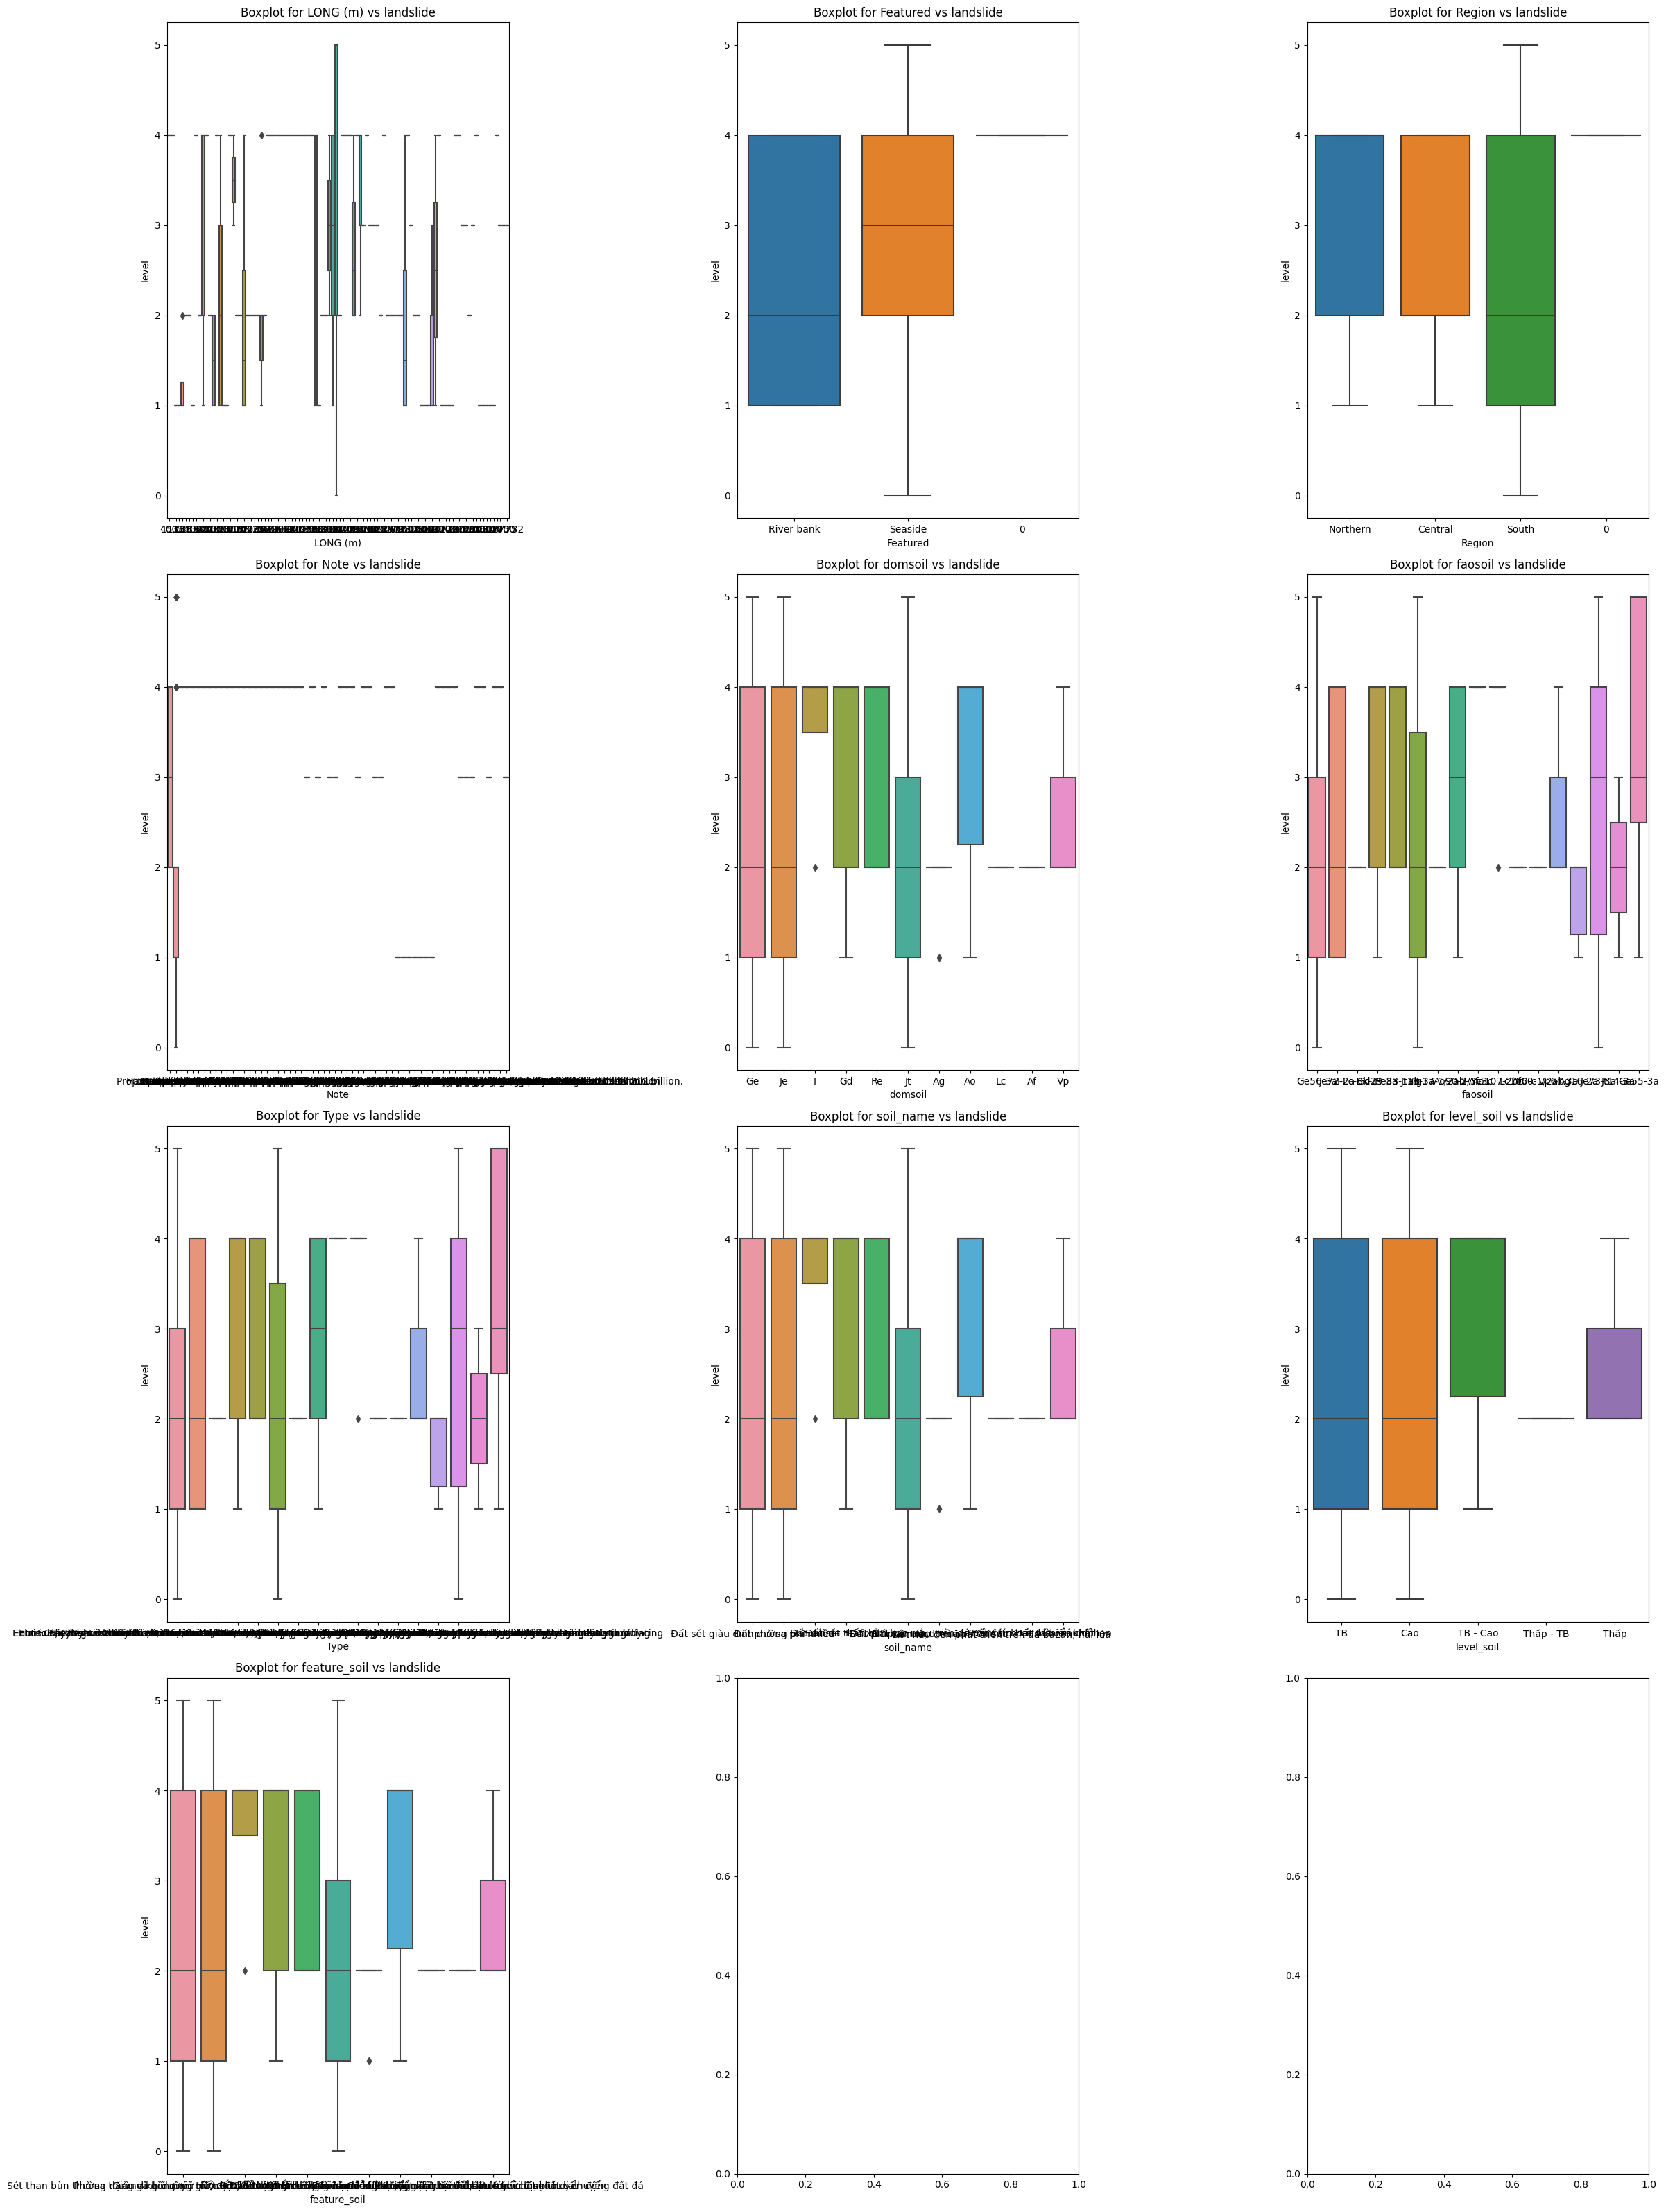

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_vars = ['LONG (m)', 'Featured', 'Region', 'Note', 'domsoil', 'faosoil', 'Type', 'soil_name', 'level_soil', 'feature_soil']

df_boxplot = df[categorical_vars + ['level']]

num_rows = 4
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(24, 8*num_rows))

for i, var in enumerate(categorical_vars):
    row = i // num_cols
    col = i % num_cols
    sns.boxplot(x=var, y='level', data=df_boxplot, ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot for {var} vs landslide')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from scipy.stats import f_oneway

categorical_vars = ['LONG (m)','Featured', 'Region', 'Note', 'domsoil', 'faosoil', 'Type', 'soil_name', 'level_soil', 'feature_soil']
df_categorical = df[['level'] + categorical_vars]

result_anova_categorical = []

for var in categorical_vars:
    groups = df_categorical.groupby(var)['level'].apply(list)
    f_statistic, p_value = f_oneway(*groups)

    if p_value < 0.05:
        result_anova_categorical.append({'Variable': var, 'F-statistic': f_statistic, 'P-value': p_value, 'Mức ý nghĩa': 'Có'})
    else:
        result_anova_categorical.append({'Variable': var, 'F-statistic': f_statistic, 'P-value': p_value, 'Mức ý nghĩa': 'Không'})

result_df = pd.DataFrame(result_anova_categorical)

result_df_sorted = result_df.sort_values(by='F-statistic', ascending=False)


In [ ]:
result_df_sorted_df=pd.DataFrame(result_df_sorted)

In [ ]:
result_df_sorted_df

,Variable,F-statistic,P-value,Mức ý nghĩa
8,level_soil,3.434323,0.009804,Có
2,Region,2.759214,0.043588,Có
1,Featured,2.336951,0.099438,Không
6,Type,2.127443,0.009133,Có
5,faosoil,2.127443,0.009133,Có
7,soil_name,1.971028,0.038880,Có
9,feature_soil,1.971028,0.038880,Có
4,domsoil,1.971028,0.038880,Có
3,Note,1.752419,0.004353,Có
0,LONG (m),0.713309,0.949464,Không


#Machine Learning

In [ ]:
# vars = ['Region', 'Note', 'domsoil', 'faosoil', 'Type', 'soil_name', 'level_soil', 'feature_soil']

In [ ]:
vars = [ 'Note', 'domsoil', 'faosoil', 'Type', 'level_soil']

In [ ]:
df[vars]

,Note,domsoil,faosoil,Type,level_soil
0,Proposed new support,Ge,Ge56-3a,"Eutric Gleysols within 56cm,fine textured, lev...",TB
1,Proposed new support,Ge,Ge56-3a,"Eutric Gleysols within 56cm,fine textured, lev...",TB
2,0,Ge,Ge56-3a,"Eutric Gleysols within 56cm,fine textured, lev...",TB
3,0,Je,Je72-2a,"Eutric Fluvisols within 72 cm, medium textured...",Cao
4,0,Je,Je72-2a,"Eutric Fluvisols within 72 cm, medium textured...",Cao
...,...,...,...,...,...
185,Has planned to allocate capital or government ...,Jt,Jt13-3a,"Thionic Fluvisols within 13 cm, fine textured,...",Cao
186,Has planned to allocate capital or government ...,Ge,Ge55-3a,"Eutric Gleysols within 55cm,fine textured, lev...",TB
187,Has planned to allocate capital or government ...,Ge,Ge55-3a,"Eutric Gleysols within 55cm,fine textured, lev...",TB
188,Has planned to allocate capital or the governm...,Je,Je73-3a,"Eutric Fluvisols within 73 cm, fine textured, ...",Cao


In [ ]:
nums = ['dis_to_river',  'Frequency', 'dist_to_flood', 'level']

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler


X = df[nums + vars]
y = df['level']

X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train[nums] = scaler.fit_transform(X_train[nums])
X_test[nums] = scaler.transform(X_test[nums])

logreg_model = LogisticRegression(random_state=42, max_iter=1000,)

# Huấn luyện mô hình
logreg_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred1 = logreg_model.predict(X_test)

# Đánh giá hiệu suất
accuracy = accuracy_score(y_test, y_pred1)
precision = precision_score(y_test, y_pred1, average='weighted')
recall = recall_score(y_test, y_pred1, average='weighted')
f1 = f1_score(y_test, y_pred1, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Accuracy: 0.8947368421052632
Precision: 0.8657599774289525
Recall: 0.8947368421052632
F1 Score: 0.8766456973587703


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


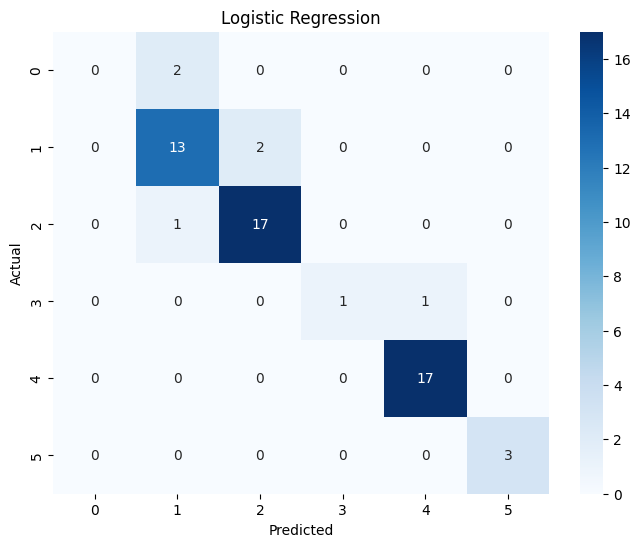

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix1 = confusion_matrix(y_test, y_pred1)

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2', '3', '4', '5'],
            yticklabels=['0', '1', '2', '3', '4', '5'])
plt.title('Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Xây dựng mô hình KNN
knn_model = KNeighborsClassifier(n_neighbors=3)

# Huấn luyện mô hình
knn_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred2 = knn_model.predict(X_test)

# Đánh giá hiệu suất
accuracy = accuracy_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2, average='weighted')
recall = recall_score(y_test, y_pred2, average='weighted')
f1 = f1_score(y_test, y_pred2, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.5964912280701754
Precision: 0.6564061669324825
Recall: 0.5964912280701754
F1 Score: 0.611191994132103


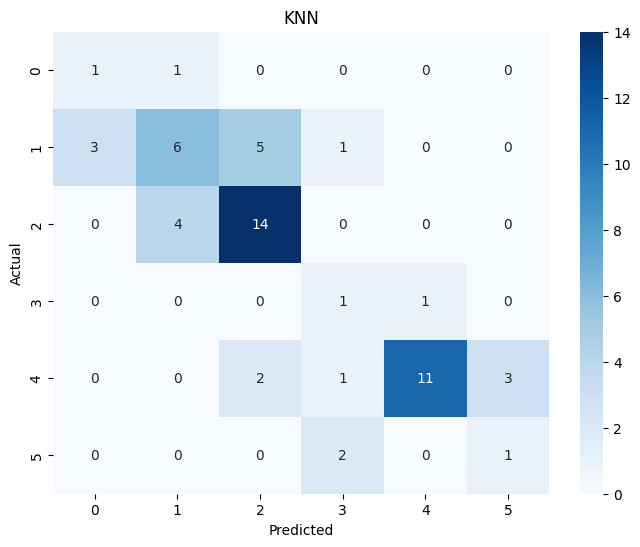

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix2 = confusion_matrix(y_test, y_pred2)

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2', '3', '4', '5'],
            yticklabels=['0', '1', '2', '3', '4', '5'])
plt.title('KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred3 = rf_model.predict(X_test)

# Đánh giá hiệu suất
accuracy = accuracy_score(y_test, y_pred3)
precision = precision_score(y_test, y_pred3, average='weighted')
recall = recall_score(y_test, y_pred3, average='weighted')
f1 = f1_score(y_test, y_pred3, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.8596491228070176
Precision: 0.8382327055095933
Recall: 0.8596491228070176
F1 Score: 0.8407706257513702


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


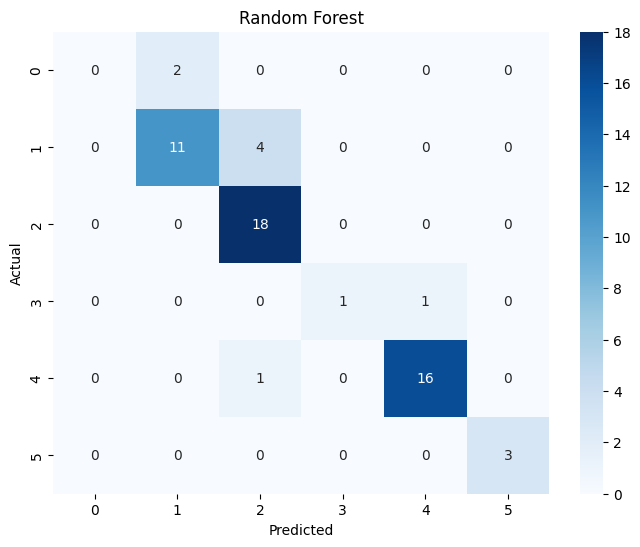

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix3 = confusion_matrix(y_test, y_pred3)

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2', '3', '4', '5'],
            yticklabels=['0', '1', '2', '3', '4', '5'])
plt.title('Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

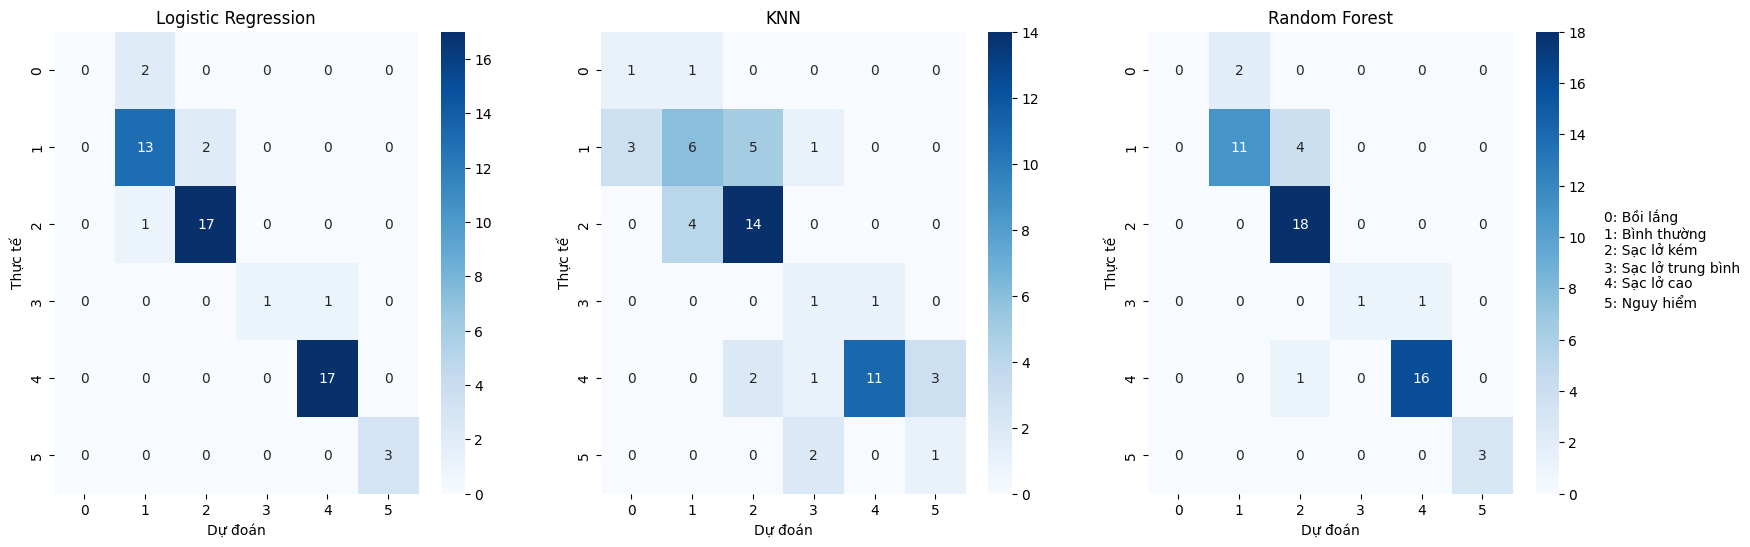

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Tạo ma trận nhầm lẫn cho từng mô hình
conf_matrix1 = confusion_matrix(y_test, y_pred1)
conf_matrix2 = confusion_matrix(y_test, y_pred2)
conf_matrix3 = confusion_matrix(y_test, y_pred3)

# Tạo subplot
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Vẽ ma trận nhầm lẫn cho Logistic Regression
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2', '3', '4', '5'],
            yticklabels=['0', '1', '2', '3', '4', '5'], ax=axes[0])
axes[0].set_title('Logistic Regression')
axes[0].set_xlabel('Dự đoán')
axes[0].set_ylabel('Thực tế')

# Vẽ ma trận nhầm lẫn cho KNN
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2', '3', '4', '5'],
            yticklabels=['0', '1', '2', '3', '4', '5'], ax=axes[1])
axes[1].set_title('KNN')
axes[1].set_xlabel('Dự đoán')
axes[1].set_ylabel('Thực tế')

# Vẽ ma trận nhầm lẫn cho Random Forest
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2', '3', '4', '5'],
            yticklabels=['0', '1', '2', '3', '4', '5'], ax=axes[2])
axes[2].set_title('Random Forest')
axes[2].set_xlabel('Dự đoán')
axes[2].set_ylabel('Thực tế')

# Chú thích nhãn chung
labels = {0: 'Bồi lắng', 1: 'Bình thường', 2: 'Sạc lở kém', 3: 'Sạc lở trung bình', 4: 'Sạc lở cao', 5: 'Nguy hiểm'}
fig.text(0.9, 0.5, '\n'.join([f"{key}: {value}" for key, value in labels.items()]),
         horizontalalignment='left', verticalalignment='center', transform=fig.transFigure)

# Hiển thị hình ảnh
plt.show()
